In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import igraph as ig
import dionysus as d

In [3]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = 10, 6

In [4]:
celegans = ig.read("data/celegansneural.gml", format="gml")
celegans.es["weight"] = celegans.es["value"]
celegans.to_undirected(combine_edges="sum")

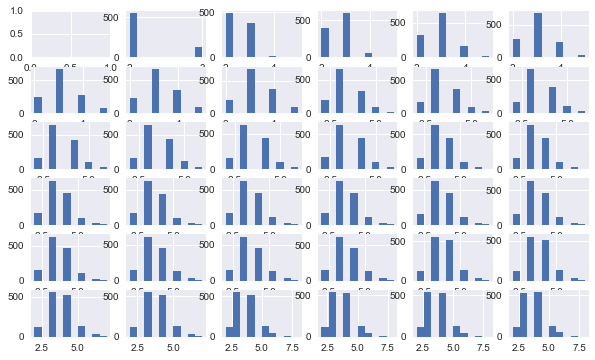

In [5]:
unique_weights = np.unique(celegans.es["weight"])
fig, ax = plt.subplots(6,6)
for i, w in enumerate(unique_weights):
    subg = celegans.subgraph_edges(celegans.es(lambda e: e["weight"] < w), delete_vertices=True)
    cl = subg.maximal_cliques()
    cl = np.array(list(map(len,cl)))
    if len(cl) > 0:
        ax[i//6,i%6].hist(cl,bins=10)
        # print(f"Number of cliques: {len(cl)}\tMax size: {max(map(len, cl))}")

In [6]:
subg = celegans.subgraph_edges(celegans.es(lambda e: e["weight"] < 3), delete_vertices=True)
cl = subg.maximal_cliques()
cl = np.array(list(map(len,cl)))

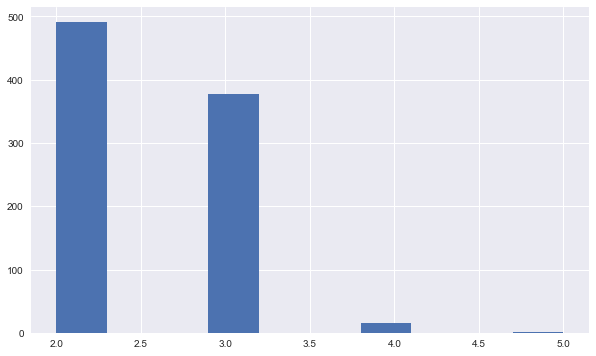

In [7]:
fig, ax = plt.subplots()
ax.hist(cl);

In [96]:
filt = d.Filtration()
for v in celegans.vs:
    filt.append(d.Simplex([v.index], 0))

In [97]:
distinct_weights = np.unique(celegans.es["weight"])[::-1]

In [98]:
for t, w in enumerate(distinct_weights):
    subg = celegans.subgraph_edges(celegans.es(lambda e: e["weight"] >= w))
    for clique in subg.maximal_cliques():
        for s in d.closure([d.Simplex(clique)], len(clique)):
            filt.append(d.Simplex(s, t+1))
filt.sort()

In [103]:
pers = d.homology_persistence(filt)
dgms = d.init_diagrams(pers, filt)
print(dgms)

[Diagram with 297 points, Diagram with 2678 points, Diagram with 171 points, Diagram with 4 points, Diagram with 0 points, Diagram with 0 points, Diagram with 0 points, Diagram with 0 points]


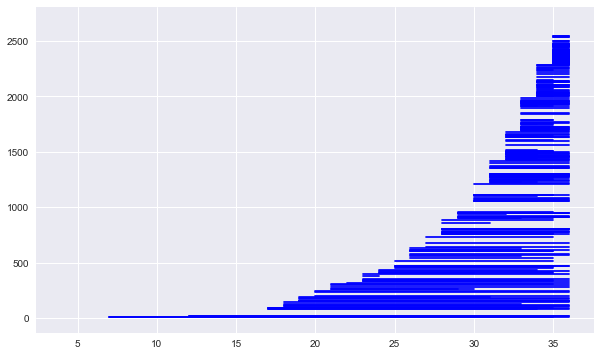

In [130]:
d.plot.plot_bars(dgms[1])

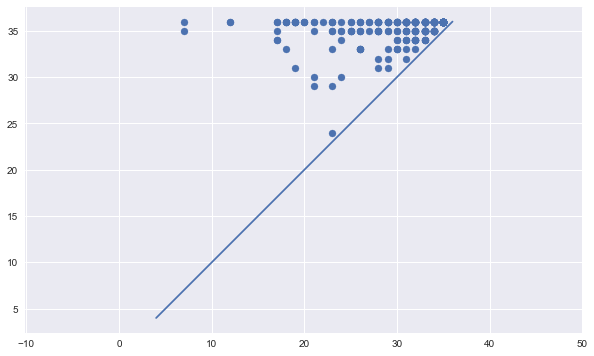

In [131]:
d.plot.plot_diagram(dgms[1])